<br>Binary Classification with Logistic Regression<br>

# Overview

In this project, you are going to implement logistic regression from scratch. You are provided
a subset of the famous handwritten digit dataset called MNIST. In the subset, you will find images of digit 1 and 5. Therefore, you will be solving a binary classification problem. The project includes feature extraction, model training, and evaluation steps.

First, you will load and visualize the data portion we have provided to you and then extract two different set of features to build a classifier on. When you extracted the desired features, you will run your logistic regression implementation with gradient descent on the representations to classify digits into 1 and 5. You will experiment with different learning rates  and regularization parameter ($\lambda$) and find the optimal $\lambda$ with 5-fold cross validation. Finally, you will evaluate the implemented models, decide which is the best performing one and visualize a decision boundary.

Follow the steps on this notebook that would guide you through the solution step-by-step. Make sure that the notebook reports your work properly and add comments and opinions when necessary.

**IMPORTANT NOTE:** You are allowed to use third-party libraries such as `numpy` and `matplotlib` to help you implement necessary procedures. However, you should not import any function that accomplishes the task itself. For instance, you can use `numpy` arrays for matrix operations, but you cannot use `scikit-learn` to implement cross validation.

## Task 1: Feature Extraction (35 Pts)

Load the training/test data and labels as numpy arrays (Hint:`np.load`). Train and test data are 1561x256 and 424x256 dimensional matrices, respectively. Each row in the
aforementioned matrices corresponds to an image of a digit. The 256 pixels correspond to a 16x16 image. Label 1 is assigned to digit 1 and label -1 is assigned to digit 5.

In [1]:
import numpy as np
test_data = np.load('./data/data/test_data.npy')
test_labels = np.load('./data/data/test_labels.npy')
train_data = np.load('./data/data/train_data.npy')
train_labels = np.load('./data/data/train_labels.npy')

**(5 points)** Display two of the digit images, one for digit 1 and one for digit 5. You can use `imshow` function of `matplotlib` library with a suitable colormap. You will first need to reshape 256 pixels to a 16x16 matrix. 

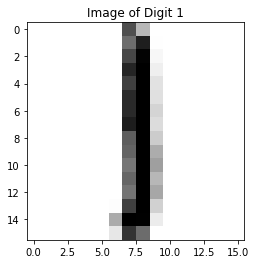

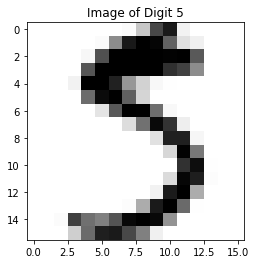

In [17]:
import matplotlib.pyplot as plt 

first_row = train_data[0]
last_row = train_data[-1]

matrix_of_1 = first_row.reshape(16,16)
matrix_of_5 = last_row.reshape(16,16)

plt.figure()
plt.title("Image of Digit 1")
plt.imshow(matrix_of_1,cmap = "Greys")
plt.show()
plt.figure()
plt.title("Image of Digit 5")
plt.imshow(matrix_of_5, cmap = "Greys")
plt.show()

**(10 points) Implementing Representation 1:** Extract the **symmetry** and **average intensity** features discussed in the class (see logistic regression lecture notes). To compute the intensity features, compute the average pixel value of the image, and for the symmetry feature, compute the negative of the norm of the difference between the image and its y-axis symmetrical. Search numpy's documentation to find the suitable function at each step. You should extract these two features for each image in the training and test sets. As a result, you should obtain a training data matrix of size 1561x2 and test data matrix of size 424x2.

Throughout the notebook, we will refer the representation with these two features as **Representation 1** 

In [18]:
train_data_matrix = np.empty([len(train_data),2])
test_data_matrix = np.empty([len(test_data),2])

for i in range(0,len(train_data_matrix)):
    train_data_matrix[i][0] = np.mean(train_data[i])
    
for i in range(0,len(test_data_matrix)):
    test_data_matrix[i][0] = np.mean(test_data[i])
    
for i in range(0,len(train_data_matrix)):
    reshaped = train_data[i].reshape(16,16)
    flipped = np.fliplr(reshaped).reshape(1,256)
    norm = np.linalg.norm(np.subtract(train_data[i],flipped))
    train_data_matrix[i][1] = -norm
    
for i in range(0,len(test_data_matrix)):
    reshaped = test_data[i].reshape(16,16)
    flipped = np.fliplr(reshaped).reshape(1,256)
    norm = np.linalg.norm(np.subtract(test_data[i],flipped))
    test_data_matrix[i][1] = -norm

**(5 points)** Provide two scatter plots, one for training and one for test data. The plots should contain the average intensity values in the x-axis and symmetry values in the
y-axis. Denote the data points of label 1 with blue marker shaped <font color='blue'>o</font> and the data points of label -1 with a red marker shaped <font color='red'>x</font>. (Hint: check out `plt.scatter` and its `marker` and `color` parameters). Explicitly state the axis labels and figure title for both plots (Hint: `plt.xlabel`, `plt.ylabel`, `plt.title`). 

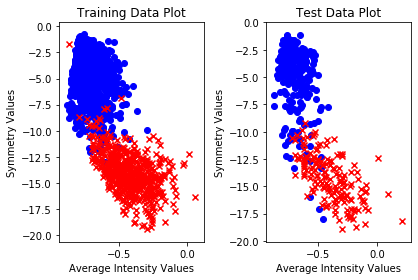

In [19]:
def scatter(matrix, label):
    
    for i in range(0,len(matrix)):
        color = ""
        marker = ""
        if(label[i] == 1):
            color = "blue"
            marker = "o"
        else:
            color = "red"
            marker = "x"

        x = matrix[i][0]
        y = matrix[i][1]
        plt.scatter(x,y,marker=marker,c=color)



plt.subplot(1, 2, 1)
plt.title('Training Data Plot')
plt.xlabel('Average Intensity Values')
plt.ylabel('Symmetry Values')
scatter(train_data_matrix,train_labels)



plt.subplot(1, 2, 2)
plt.title('Test Data Plot')
plt.xlabel('Average Intensity Values')
plt.ylabel('Symmetry Values')

scatter(test_data_matrix,test_labels)

plt.tight_layout()
plt.show()

**(15 points) Implementing Representation 2:** Come up with an alternative feature extraction approach. The features can again be 2-D, or higher dimensional. If you use any external resource, please cite the references. Explain the feature extraction procedure clearly in your report; if it is an algorithm, provide the algorithm; if it is a function, provide the mathematical expressions. 

If your proposed features are 2-D or 3-D, provide the scatter plots similar to the previous step.

We will refer this representation proposed by you as **Representation 2**.

In [20]:
def createWidthFeature( image ):
    img = image.reshape((16,16))
    summed = img.sum(axis=0)
    leftStart = 0
    rightStart = 15
    # Starting from left, looks for first occurring pixel value
    # empty pixels are denoted with -1, so column summation is -16 for empty column
    for index, sm in enumerate(summed): 
        if(sm!=-16):
            leftStart = index
            break
    # First non -1 pixel index from right
    for index, sm in enumerate(summed[::-1]):
        if(sm!=-16):
            rightStart = index
            break
    width = 16-leftStart-rightStart 
    return width

In [7]:
def createColorFeature( image ):
    imageSharpened = np.where(image < -0.5, 0, 1)
    l = colorChangeLeftDiagonal(imageSharpened)
    r = colorChangeRightDiagonal(imageSharpened)
    h = colorChangeHorizontal(imageSharpened)
#     print(l, r, h)
    return -(l+r+h)
def colorChangeHorizontal( img ):
    image = img.reshape(16,16)
    prevColor = 0
    currentColor = 0
    counter = 0
    i = 7
    j = 0
    while(j<16):
        currentColor = image[i,j]
        counter+=currentColor^prevColor
        prevColor = currentColor
        j+=1
    return counter

def colorChangeRightDiagonal( img ):
    image = img.reshape(16,16)
    prevColor = 0
    currentColor = 0
    counter = 0
    i = 0
    j = 15
    while(i<16):
        currentColor = image[i,j]
        counter+=currentColor^prevColor
        prevColor = currentColor
        i+=1
        j-=1
    return counter

def colorChangeLeftDiagonal(img):
    image = img.reshape(16,16)
    prevColor = 0
    currentColor = 0
    counter = 0
    i = j = 0
    while(i<16):
        currentColor = image[i,j]
        counter+=currentColor^prevColor
        prevColor = currentColor
        i+=1
        j+=1
    return counter

In [21]:
newFeatures_train = np.empty([len(train_data),2])
newFeatures_train[:, 0] = np.apply_along_axis(createWidthFeature, axis=1, arr=train_data)
newFeatures_train[:, 1] = np.apply_along_axis(createColorFeature, axis=1, arr=train_data)

newFeatures_test = np.empty([len(test_data),2])
newFeatures_test[:, 0] = np.apply_along_axis(createWidthFeature, axis=1, arr=test_data)
newFeatures_test[:, 1] = np.apply_along_axis(createColorFeature, axis=1, arr=test_data)

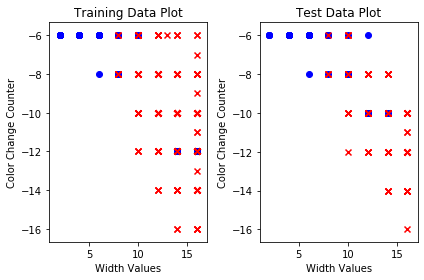

In [22]:
plt.subplot(1, 2, 1)
plt.title('Training Data Plot')
plt.xlabel('Width Values')
plt.ylabel('Color Change Counter')

scatter(newFeatures_train,train_labels)

plt.subplot(1, 2, 2)
plt.title('Test Data Plot')
plt.xlabel('Width Values')
plt.ylabel('Color Change Counter')

scatter(newFeatures_test,test_labels)

plt.tight_layout()
plt.show()

## Task 2: Logistic Regression (40 Pts)

**(20 points)** Implement the logistic regression classifier from scratch with gradient descent and train it using Representation 1 and Representation 2 as inputs. Concatenate
1 to your features for the intercept term, such that one data point will look like for 2-D features [1,$x_1$,$x_2$], and the model vector will be [$w_0, w_1, w_2$], where $w_0$ is the intercept parameter. 
You can refer to lecture notes (Logistic regression slides 29-30) to review the gradient descent learning algorithm and the logistic loss. To implement the gradient of the logistic loss with respect to $w$, first derive its expression by hand. Please include your derivation in your report.

To prove that your implementation is converging, keep the loss values at each gradient descent iteration in a numpy array. After the training is finalized, plot the loss values
with respect to iteration count (Hint: `plt.plot`). You should observe a decreasing loss as the number of iterations increases. Also, experiment with 5 different learning rates between 0 and 1, and plot the convergence curves for each learning rate in the same plot to observe the effect of the learning rate (step size) on the convergence. 

To decide when to terminate the gradient descent iterations, check the absolute difference between the current loss value and the loss value of the previous step. If the difference is less than a small number, such as $10^{-5}$, you can exit the loop.

\begin{align}
\nabla E(w) = \frac{\partial E(w)}{\partial w} = {\frac{1}{N}} \sum_{n=1}^{N} \frac{\partial (\ln({1+e^{-ynw^txn}))}}{\partial w} = {\frac{1}{N}} \sum_{n=1}^{N} \frac{\frac{\partial (1+e^{-ynw^txn})}{\partial w}} {(1+e^{-ynw^txn})}   \\
\nabla E(w) = {\frac{1}{N}} \sum_{n=1}^{N} \frac{-ynxne^{-ynw^txn}}{(1+e^{-ynw^txn})}   \qquad, \nabla(w^txn) = xn \\
\nabla E(w) = {\frac{1}{N}} \sum_{n=1}^{N} \frac{-ynxne^{-ynw^txn} e^{ynw^txn}} {(1+e^{ynw^txn})} \\
\nabla E(w) = -{\frac{1}{N}} \sum_{n=1}^{N} \frac{-ynxn}{1+e^{ynw^txn}}
\end{align}

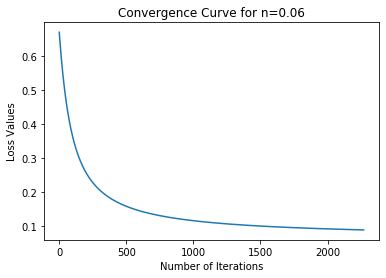

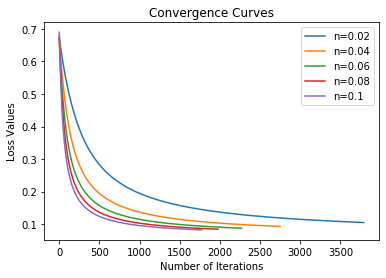

In [23]:
def sigmoid(S):
    
    return (1 / (1 + np.exp(-S)))

def loss_function(X,Y,W,Lambda,Regularization):

    summation = 0
    N = X.shape[0]
    
    for i in range(0,N):
        dot = np.dot(X[i],W)
        summation = summation + np.log(1+np.exp(-Y[i]*dot))

    loss = summation / N
    
    if Regularization == True:
        loss = loss + (Lambda*np.linalg.norm(W))/2
    
    return loss
    
def add_intercept(X):
    intercept_vector = np.ones((X.shape[0], 1))
    return np.concatenate((intercept_vector, X), axis=1)

def gradient(X,Y,W,Lambda,Regularization):
  
    total = 0
    N = X.shape[0]
    
    for i in range(0,N):
        dot = np.dot(X[i],W)
        total = total + ((Y[i]*X[i]) / (1+np.exp(Y[i]*dot)))
        
    gt = -(total / N)
    
    if Regularization == True:
        gt = gt + (Lambda*W)
        
    return gt
            
    
def learning_algorithm(X,Y,W,n,Lambda,Regularization):
    
    t = 0
    #current_loss = pow(10,6)
    current_loss = pow(10,2)
    previous_loss = 0
    loss_values = []
    
    while(abs(current_loss - previous_loss) > pow(10,-5)):
        
        gt = gradient(X,Y,W,Lambda,Regularization)
        v = -gt
        W = W + n*v

        loss_value = loss_function(X,Y,W,Lambda,Regularization)
        loss_values.append(loss_value)
        
        previous_loss = current_loss
        current_loss = loss_value
        t = t+1
        
        
    final_W = W
    loss_values = np.asarray(loss_values)
    
    return final_W,loss_values,t


X = add_intercept(train_data_matrix)
W = np.zeros(X.shape[1])


n = 0.02
final_W,loss_values,iteration = learning_algorithm(X,train_labels,W,n,0,False)

x1 = np.arange(iteration) + 1
y1 = loss_values

n = 0.04
final_W,loss_values,iteration = learning_algorithm(X,train_labels,W,n,0,False)

x2 = np.arange(iteration) + 1
y2 = loss_values

n = 0.06
final_W,loss_values,iteration = learning_algorithm(X,train_labels,W,n,0,False)

x3 = np.arange(iteration) + 1
y3 = loss_values


plt.plot(x3, y3)
plt.title('Convergence Curve for n=0.06')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Values')
plt.show()

n = 0.08
final_W,loss_values,iteration = learning_algorithm(X,train_labels,W,n,0,False)

x4 = np.arange(iteration) + 1
y4 = loss_values

n = 0.1
final_W,loss_values,iteration = learning_algorithm(X,train_labels,W,n,0,False)

x5 = np.arange(iteration) + 1
y5 = loss_values

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)

plt.title('Convergence Curves')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Values')

plt.legend(["n=0.02", "n=0.04","n=0.06","n=0.08","n=0.1"])
plt.show()

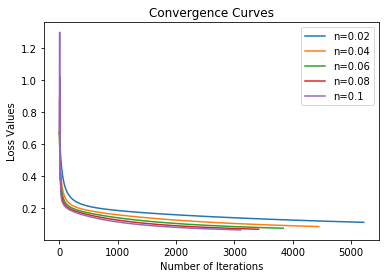

In [24]:
#Representation 2
X_R2 = add_intercept(newFeatures_train)
n = 0.02

final_W,loss_values,iteration = learning_algorithm(X_R2,train_labels,W,n,0,False)


x1 = np.arange(iteration) + 1
y1 = loss_values

n = 0.04
final_W,loss_values,iteration = learning_algorithm(X_R2,train_labels,W,n,0,False)

x2 = np.arange(iteration) + 1
y2 = loss_values

n = 0.06
final_W,loss_values,iteration = learning_algorithm(X_R2,train_labels,W,n,0,False)

x3 = np.arange(iteration) + 1
y3 = loss_values

n = 0.08
final_W,loss_values,iteration = learning_algorithm(X_R2,train_labels,W,n,0,False)

x4 = np.arange(iteration) + 1
y4 = loss_values

n = 0.1
final_W,loss_values,iteration = learning_algorithm(X_R2,train_labels,W,n,0,False)

x5 = np.arange(iteration) + 1
y5 = loss_values

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)

plt.title('Convergence Curves')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Values')

plt.legend(["n=0.02", "n=0.04","n=0.06","n=0.08","n=0.1"])
plt.show()


**(10 points)** Implement logistic regression with $\ell_2$ norm regularization, $||\mathbf{w}||_{2}^{2}$ . Show that your implementation is working by visualizing the loss over the iterations again. Visualization for a single learning rate and $\lambda$ suffices. 

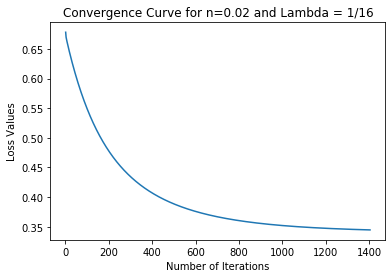

In [25]:
n = 0.02
Lambda = 1/16
Regularization = True

final_W,loss_values,iteration = learning_algorithm(X,train_labels,W,n,Lambda,Regularization)

x6 = np.arange(iteration) + 1
y6 = loss_values

plt.plot(x6, y6)
plt.title('Convergence Curve for n=0.02 and Lambda = 1/16')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Values')
plt.show()

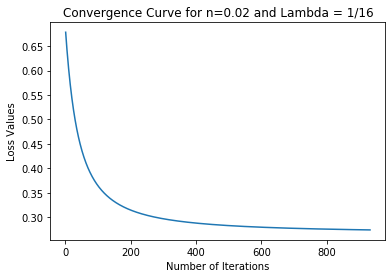

In [26]:
#Represantation 2

n = 0.02
Lambda = 1/16
Regularization = True

final_W,loss_values,iteration = learning_algorithm(X_R2,train_labels,W,n,Lambda,Regularization)

x6 = np.arange(iteration) + 1
y6 = loss_values

plt.plot(x6, y6)
plt.title('Convergence Curve for n=0.02 and Lambda = 1/16')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Values')
plt.show()

**(10 points)** Implement a 5-fold cross validation procedure to find the optimal $\lambda$ value for both Representation 1 and 2. Experiment with at least three different $\lambda$ values between 0 and 1. Report the mean/std of cross validation accuracy of every representation/parameter combination as a table and clearly mark the best configuration in your report. 

In [42]:
def parser(X,Y,S):

    remainder = (X.shape[0])%S
    X_converted = X[:-remainder, :]
    Y_converted = Y[:-remainder] 
    
    #shuffling train set and label with same order
    s = np.arange(X_converted.shape[0])
    np.random.shuffle(s)
    X_converted = X[s]
    Y_converted = Y[s]
    X_converted = add_intercept(X_converted)
    ###########
    
    
    Splitted_X  = np.split(X_converted,S,axis=0)
    Splitted_Y = np.split(Y_converted,S,axis=0)
    
    X_train_sets = []
    Y_train_labels = []

    X_train_set_1 = np.concatenate((Splitted_X[1],Splitted_X[2],Splitted_X[3],Splitted_X[4]),axis= 0)
    X_train_set_2 = np.concatenate((Splitted_X[0],Splitted_X[2],Splitted_X[3],Splitted_X[4]),axis= 0)
    X_train_set_3 = np.concatenate((Splitted_X[0],Splitted_X[1],Splitted_X[3],Splitted_X[4]),axis= 0)
    X_train_set_4 = np.concatenate((Splitted_X[0],Splitted_X[1],Splitted_X[2],Splitted_X[4]),axis= 0)
    X_train_set_5 = np.concatenate((Splitted_X[0],Splitted_X[1],Splitted_X[2],Splitted_X[3]),axis= 0)


    Y_train_label_1 = np.concatenate((Splitted_Y[1],Splitted_Y[2],Splitted_Y[3],Splitted_Y[4]),axis= 0)
    Y_train_label_2 = np.concatenate((Splitted_Y[0],Splitted_Y[2],Splitted_Y[3],Splitted_Y[4]),axis= 0)
    Y_train_label_3 = np.concatenate((Splitted_Y[0],Splitted_Y[1],Splitted_Y[3],Splitted_Y[4]),axis= 0)
    Y_train_label_4 = np.concatenate((Splitted_Y[0],Splitted_Y[1],Splitted_Y[2],Splitted_Y[4]),axis= 0)
    Y_train_label_5 = np.concatenate((Splitted_Y[0],Splitted_Y[1],Splitted_Y[2],Splitted_Y[3]),axis= 0)


    X_train_sets.append(X_train_set_1)
    X_train_sets.append(X_train_set_2)
    X_train_sets.append(X_train_set_3)
    X_train_sets.append(X_train_set_4)
    X_train_sets.append(X_train_set_5)

    Y_train_labels.append(Y_train_label_1)
    Y_train_labels.append(Y_train_label_2)
    Y_train_labels.append(Y_train_label_3)
    Y_train_labels.append(Y_train_label_4)
    Y_train_labels.append(Y_train_label_5)
    
    return Splitted_X, Splitted_Y, X_train_sets ,Y_train_labels


def cross_validation(S,Splitted_X,Splitted_Y,X_train_sets,Y_train_labels,W,learning_rate,Lambda_List,Regularization):
    
    Results = np.empty([S,len(Lambda_List)])
    threshold = 0.5
    
    for i in range(0,S):
        for ii in range(0,len(Lambda_List)):

            counter = 0
            final_W,loss_values,iteration = learning_algorithm(X_train_sets[i],Y_train_labels[i],W,learning_rate,Lambda_List[ii],Regularization)
            dot_product = np.dot(Splitted_X[i],final_W)
            comparison = sigmoid(dot_product)

            for iii in range(0,len(comparison)):

                if(comparison[iii]>=threshold and Splitted_Y[i][iii]==1):
                    counter = counter+1    
                elif(comparison[iii]<threshold and Splitted_Y[i][iii]==-1):
                    counter = counter+1
            result = (counter / len(comparison))*100

            Results[i][ii] = result
            
    return Results


S = 5
learning_rate = 0.1
Regularization = True
Lambda_List = [1/16 , 1/32, 1/64, 1/128]

Splitted_X, Splitted_Y, X_train_sets ,Y_train_labels = parser(train_data_matrix,train_labels,S)
Results = cross_validation(S,Splitted_X,Splitted_Y,X_train_sets,Y_train_labels,W,learning_rate,Lambda_List,Regularization)

Accuracy_means = Results.mean(0)
Accuracy_stds = Results.std(0)

In [43]:
!pip3 install PTable
from prettytable import PrettyTable
    
table = PrettyTable()
table.field_names = ["Representation 1 with n=0.1","Lambda = 1/16", "Lambda = 1/32", "Lambda = 1/64", "Lambda = 1/128"]
table.add_row(["Cross Validation Accuracy Mean", Accuracy_means[0],Accuracy_means[1],Accuracy_means[2],Accuracy_means[3]])
table.add_row(["Cross Validation Std", Accuracy_stds[0], Accuracy_stds[1], Accuracy_stds[2], Accuracy_stds[3]])
print(table)

+--------------------------------+-------------------+---------------------+---------------------+--------------------+
|  Representation 1 with n=0.1   |   Lambda = 1/16   |    Lambda = 1/32    |    Lambda = 1/64    |   Lambda = 1/128   |
+--------------------------------+-------------------+---------------------+---------------------+--------------------+
| Cross Validation Accuracy Mean | 96.60256410256412 |  97.11538461538461  |   97.3076923076923  |        97.5        |
|      Cross Validation Std      | 0.774554229076568 | 0.49653632643684376 | 0.43476474250802605 | 0.5128205128205081 |
+--------------------------------+-------------------+---------------------+---------------------+--------------------+


In [40]:
S = 5
learning_rate = 0.1
Regularization = True
Lambda_List = [1/16 , 1/32, 1/64, 1/128]

Splitted_X, Splitted_Y, X_train_sets ,Y_train_labels = parser(newFeatures_train,train_labels,S)
Results = cross_validation(S,Splitted_X,Splitted_Y,X_train_sets,Y_train_labels,W,learning_rate,Lambda_List,Regularization)

Accuracy_means = Results.mean(0)
Accuracy_stds = Results.std(0)

In [41]:
!pip3 install PTable
from prettytable import PrettyTable
    
table = PrettyTable()
table.field_names = ["Representation 2 with n=0.1","Lambda = 1/16", "Lambda = 1/32", "Lambda = 1/64", "Lambda = 1/128"]
table.add_row(["Cross Validation Accuracy Mean", Accuracy_means[0],Accuracy_means[1],Accuracy_means[2],Accuracy_means[3]])
table.add_row(["Cross Validation Std", Accuracy_stds[0], Accuracy_stds[1], Accuracy_stds[2], Accuracy_stds[3]])
print(table)

+--------------------------------+-------------------+-------------------+--------------------+--------------------+
|  Representation 2 with n=0.1   |   Lambda = 1/16   |   Lambda = 1/32   |   Lambda = 1/64    |   Lambda = 1/128   |
+--------------------------------+-------------------+-------------------+--------------------+--------------------+
| Cross Validation Accuracy Mean | 94.23076923076924 | 94.23076923076924 | 94.93589743589743  | 96.21794871794873  |
|      Cross Validation Std      | 1.181992879140113 | 1.181992879140113 | 1.1715171078523756 | 0.7954919003840245 |
+--------------------------------+-------------------+-------------------+--------------------+--------------------+


## Task 3: Evaluation (25 Pts)

**(5 points)** Train the logistic regression classifier on Representation 1 and 2 with the best learning rate you decide. Similarly, train the regularized logistic regression classifier with the best $\lambda$ you obtained by 5-fold cross validation. Report the training and test classification accuracy as 
\begin{align*}
\frac{\text{number of correctly classified samples}}{\text{total number of samples}}x100
\end{align*}

In [94]:
def accuracy(data,weight,labels):
       
        counter = 0
        threshold = 0.5
        dot_product = np.dot(data,weight)
        comparison = sigmoid(dot_product)
        
        for i in range(0,len(comparison)):
            
            if(comparison[i]>=threshold and labels[i]==1):
                    counter = counter+1    
            elif(comparison[i]<threshold and labels[i]==-1):
                    counter = counter+1
                    
        result = (counter / len(comparison))*100
        
        return result
        

Test_X = add_intercept(test_data_matrix)

n = 0.1
Regularization = False
final_W,loss_values,iteration = learning_algorithm(X,train_labels,W,n,0,Regularization)

w_guess = final_W #to use in decision boundary

accuracy_0 = accuracy(X,final_W,train_labels)
print("Training Classification Accuracy of Representation 1 with best learning rate: " + str(accuracy_0))
accuracy_1 = accuracy(Test_X,final_W,test_labels)
print("Test Classification Accuracy of Representation 1 with best learning rate: " + str(accuracy_1))

Lambda = 1/128
Regularization = True

final_W,loss_values,iteration = learning_algorithm(X,train_labels,W,n,Lambda,Regularization)
accuracy_2 = accuracy(X,final_W,train_labels)
print("Training Classification Accuracy of Representation 1 with best lambda: " + str(accuracy_2))
accuracy_3 = accuracy(Test_X,final_W,test_labels) 
print("Test Classification Accuracy of Representation 1 with best lambda: "+ str(accuracy_3))

Training Classification Accuracy of Representation 1 with best learning rate: 97.69378603459322
Test Classification Accuracy of Representation 1 with best learning rate: 95.04716981132076
Training Classification Accuracy of Representation 1 with best lambda: 97.50160153747598
Test Classification Accuracy of Representation 1 with best lambda: 95.04716981132076


In [95]:
Test_X = add_intercept(newFeatures_test)

n = 0.1
Regularization = False
final_W,loss_values,iteration = learning_algorithm(X_R2,train_labels,W,n,0,Regularization)


accuracy_0 = accuracy(X_R2,final_W,train_labels)
print("Training Classification Accuracy of Representation 2 with best learning rate: " + str(accuracy_0))

accuracy_1 = accuracy(Test_X,final_W,test_labels)
print("Test Classification Accuracy of Representation 2 with best learning rate: " + str(accuracy_1))


Lambda = 1/128
Regularization = True

final_W,loss_values,iteration = learning_algorithm(X_R2,train_labels,W,n,Lambda,Regularization)

accuracy_2 = accuracy(X_R2,final_W,train_labels)
print("Training Classification Accuracy of Representation 2 with best lambda: " + str(accuracy_2))

accuracy_3 = accuracy(Test_X,final_W,test_labels)      
print("Test Classification Accuracy of Representation 2 with best lambda: "+ str(accuracy_3))

Training Classification Accuracy of Representation 2 with best learning rate: 99.10313901345292
Test Classification Accuracy of Representation 2 with best learning rate: 96.93396226415094
Training Classification Accuracy of Representation 2 with best lambda: 96.22037155669443
Test Classification Accuracy of Representation 2 with best lambda: 94.33962264150944


**(15 points)** Visualize the decision boundary (the line that is given by $\mathbf{w}^{T}x=0$) obtained from the logistic regression classifier learned without regularization. For this purpose, use only Representation 1. Provide two scatter plots for training and test data points with the decision boundary shown on each of the plots.

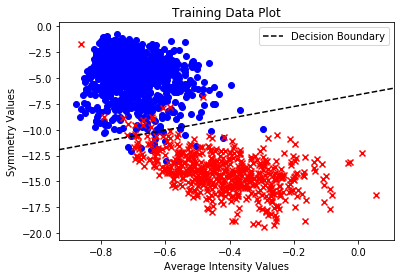

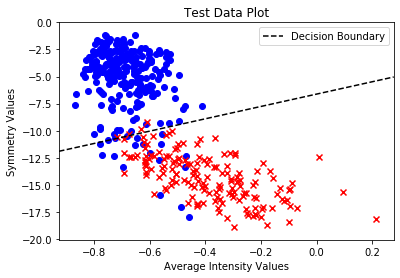

In [57]:
plt.figure()
scatter(train_data_matrix,train_labels)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(w_guess[0]+w_guess[1]*x_vals)/w_guess[2]
plt.plot(x_vals, y_vals, '--', c="black", label='Decision Boundary')
plt.title('Training Data Plot')
plt.xlabel('Average Intensity Values')
plt.ylabel('Symmetry Values')
plt.legend()
plt.show()

plt.figure()
scatter(test_data_matrix,test_labels)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(w_guess[0]+w_guess[1]*x_vals)/w_guess[2]
plt.plot(x_vals, y_vals, '--', c="black", label='Decision Boundary')
plt.title('Test Data Plot')
plt.xlabel('Average Intensity Values')
plt.ylabel('Symmetry Values')
plt.legend()
plt.show()

**(5 points)** Comment on your work in your report. Include the answers for the following questions in your discussion. 

* Did regularization improve the generalization performance (did it help reducing the gap between training and test accuracies/errors)? Did you observe any difference between using Representation 1 and 2?
* Which feature set did give the best results? Which one is more discriminative?
* What would be your next step to improve test accuracy? 